In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 71
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [3]:
Current_Snapshot = 99
Subhalo_Index = 329508


In [4]:
PartType4_Fields=['Coordinates','Masses','GFM_StellarFormationTime']
PartType4_Dict=il.snapshot.loadSubhalo(basePath,Current_Snapshot,Subhalo_Index,4,PartType4_Fields)


In [10]:
Subhalo_Dict=il.groupcat.loadSingle(basePath,Current_Snapshot,-1,Subhalo_Index)


In [19]:
PartType4_Dict['Distance']=np.linalg.norm(PartType4_Dict['Coordinates']-Subhalo_Dict['SubhaloPos'],axis=1)


(array([4.78080893e+00, 3.11855406e-01, 9.27287564e-02, 4.16692048e-02,
        1.56795178e-02, 4.55645705e-03, 1.22340373e-03, 2.17747875e-04,
        1.06356703e-04, 8.22118545e-06]),
 array([4.66785220e-03, 6.83932538e+01, 1.36781840e+02, 2.05170426e+02,
        2.73559012e+02, 3.41947598e+02, 4.10336184e+02, 4.78724770e+02,
        5.47113355e+02, 6.15501941e+02, 6.83890527e+02]),
 <BarContainer object of 10 artists>)

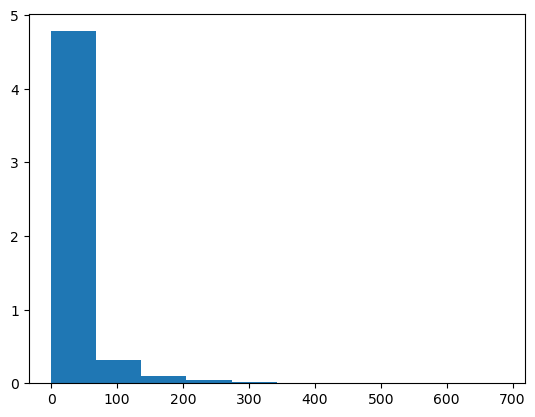

In [23]:
plt.hist(PartType4_Dict['Distance'][np.where(PartType4_Dict['GFM_StellarFormationTime']<0.3)[0]],weights=PartType4_Dict['Masses'][np.where(PartType4_Dict['GFM_StellarFormationTime']<0.3)[0]])


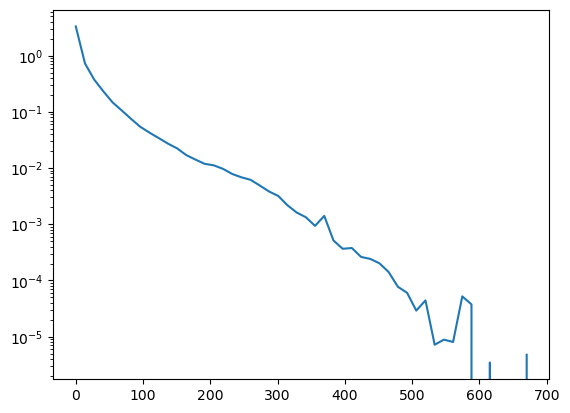

In [34]:
condition=PartType4_Dict['GFM_StellarFormationTime']<0.3
hist,binrange=np.histogram(PartType4_Dict['Distance'][np.where(condition)[0]],bins=50,weights=PartType4_Dict['Masses'][np.where(condition)[0]])
plt.semilogy(binrange[:50],hist)
